In [42]:
from sidemethods import load_richardson_data, convert_to_float
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity


# local path to model repository on our servers
server_model_path = "/mounts/data/corp/huggingface/"
# loading the original human data as vectors for each action word
_, richardson_data, richardson_normed = load_richardson_data()
action_words = richardson_normed.keys()

In [43]:
def get_construct_sims(model_choices):
    similarity_scores_items = {}
    similarity_scores_constructs = {'Horizontal':0, 'Neutral':0, 'Vertical':0, 'Horizon.':0, 'Neutr.':0, 'Vertic.':0}

    for idx, key in enumerate(richardson_data):

        # for each item
        vec1 = np.array(richardson_data[key])
        vec2 = np.array(model_choices[key])
        similarity = cosine_similarity([vec1], [vec2])[0][0]
        similarity_scores_items[key] = similarity

    count = 0
    for i in range(0,len(similarity_scores_items),5): # every 5th item is a different construct 
        current_constr = list(similarity_scores_constructs.keys())[count]
        constr_sum = round((sum(list(similarity_scores_items.values())[i:i+4])/5),4)
        similarity_scores_constructs[current_constr] = constr_sum
        count+=1

    return similarity_scores_constructs

In [44]:
model_name_A = "meta-llama/Llama-2-70b-chat-hf"
model_name_B = "meta-llama/Llama-2-13b-chat-hf"

model_names = [model_name_A, model_name_B]

In [45]:
data = []
for model_name in model_names:
    model_choices = dict()
    with open("results/TEXT_"+model_name.split("/")[1]+"_selections.txt", "r") as f_in:
        lines = f_in.readlines()

    for idx,line in enumerate(lines):
        if idx == 0:
            continue
        parts = line.split("\t")
        parts[-1].replace("\n","")
        model_choices[parts[0]] = [int(x) for x in parts[1:]]
    
    data.append(model_choices)

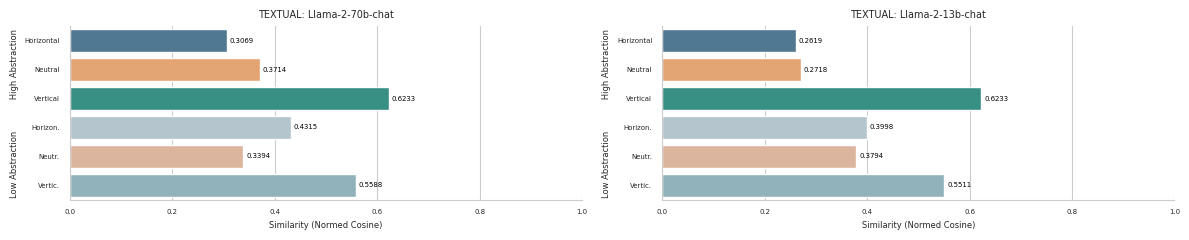

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume similarity_scores_constructs1 and similarity_scores_constructs2 are given
data1 = get_construct_sims(data[0])
data2 = get_construct_sims(data[1])
custom_palette = ['#457b9d', '#f4a261', '#2a9d8f', '#b0c6d1', '#e5b293', '#8ab6c1']

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

# Plot for the first data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data1.values()), y=list(data1.keys()), palette=custom_palette, ax=axs[0])

axs[0].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[0].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[0].set_title('TEXTUAL: '+model_names[0].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data1.values()):
    axs[0].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[0].set_xlim(0, 1)
sns.despine(ax=axs[0])
axs[0].tick_params(axis='both', labelsize=5)

# Plot for the second data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data2.values()), y=list(data2.keys()), palette=custom_palette, ax=axs[1])

axs[1].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[1].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[1].set_title('TEXTUAL: '+model_names[1].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data2.values()):
    axs[1].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[1].set_xlim(0, 1)
sns.despine(ax=axs[1])
axs[1].tick_params(axis='both', labelsize=5)
plt.savefig('results/TEXT_Llama-2_70and13.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


In [47]:
data = []
for model_name in model_names:
    model_choices = dict()
    with open("results/UNICODE_"+model_name.split("/")[1]+"_selections.txt", "r") as f_in:
        lines = f_in.readlines()

    for idx,line in enumerate(lines):
        if idx == 0:
            continue
        parts = line.split("\t")
        parts[-1].replace("\n","")
        model_choices[parts[0]] = [int(x) for x in parts[1:]]
    
    data.append(model_choices)

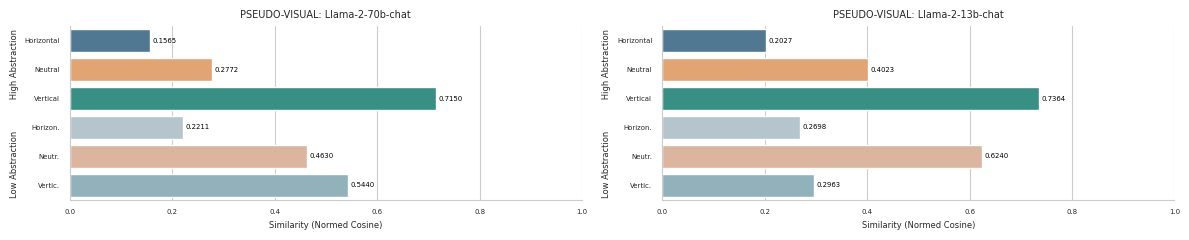

In [48]:
data1 = get_construct_sims(data[0])
data2 = get_construct_sims(data[1])
custom_palette = ['#457b9d', '#f4a261', '#2a9d8f', '#b0c6d1', '#e5b293', '#8ab6c1']

fig, axs = plt.subplots(1, 2, figsize=(12, 2.5))

# Plot for the first data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data1.values()), y=list(data1.keys()), palette=custom_palette, ax=axs[0])

axs[0].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[0].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[0].set_title('PSEUDO-VISUAL: '+model_names[0].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data1.values()):
    axs[0].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[0].set_xlim(0, 1)
sns.despine(ax=axs[0])
axs[0].tick_params(axis='both', labelsize=5)

# Plot for the second data dictionary
sns.set_style("whitegrid", rc={'axes.grid.axis': 'x'})
sns.barplot(x=list(data2.values()), y=list(data2.keys()), palette=custom_palette, ax=axs[1])

axs[1].set_xlabel('Similarity (Normed Cosine)', fontsize=6)
axs[1].set_ylabel('Low Abstraction            High Abstraction', fontsize=6)
axs[1].set_title('PSEUDO-VISUAL: '+model_names[1].split("/")[1].replace("-hf",""), fontsize=7)

for i, value in enumerate(data2.values()):
    axs[1].text(value + 0.005, i, f'{value:.4f}', va='center', fontsize=5, color='black')

axs[1].set_xlim(0, 1)
sns.despine(ax=axs[1])
axs[1].tick_params(axis='both', labelsize=5)
plt.savefig('results/UNICODE_Llama-2_70and13.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


## Spearman Values